In [4]:
#Importing all the required libraries
import numpy as np
import time
import matplotlib.pyplot as plt
from xclib.data import data_utils
from sklearn.ensemble import RandomForestClassifier as rf

In [5]:
#A function to read the files which is given in sparse format
def read_files(x, y):
    x = '../ass3_parta_data/' + x
    f = open(x, 'r')
    line = f.readline().rstrip("\n").split(" ")
    num_samples, num_feat = int(line[0]), int(line[1])
    data_x = np.zeros((num_samples, num_feat))
    i = 0
    for line in f:
        line = line.split(" ")
        for value in line:
            value = value.split(":")
            data_x[i][int(value[0])] = float(value[1])
        i += 1
    
    data_y = np.genfromtxt('../ass3_parta_data/' + y, delimiter=' ')
    
    return data_x, data_y

s = time.time()
x_train, y_train = read_files('train_x.txt', 'train_y.txt')
x_val, y_val = read_files('valid_x.txt', 'valid_y.txt')
x_test, y_test = read_files('test_x.txt', 'test_y.txt')
print("Data imported in ", time.time()-s, "s")

Data imported in  6.045020341873169 s


In [2]:
#Reading data using libraies

# s = time.time()
# x_train = data_utils.read_sparse_file('../ass3_parta_data/train_x.txt').todense()
# y_train = np.genfromtxt('../ass3_parta_data/train_y.txt', delimiter=' ')

# x_val = data_utils.read_sparse_file('../ass3_parta_data/valid_x.txt').todense()
# y_val = np.genfromtxt('../ass3_parta_data/valid_y.txt', delimiter=' ')

# x_test = data_utils.read_sparse_file('../ass3_parta_data/test_x.txt').todense()
# y_test = np.genfromtxt('../ass3_parta_data/test_y.txt', delimiter=' ')
# print("Data imported in ", time.time()-s, "s")

In [3]:
#Getting all the parameter

n_estimators = np.arange(50, 451, 100)    
max_features = np.arange(0.1, 1.0, 0.2)
min_samples_split = np.arange(2, 11, 2)

#Parameter space over grid search has to be done
parameters = []
for i in n_estimators:
    for j in max_features:
        for k in min_samples_split:
            parameters.append((i,j,k))

In [8]:
#Performing grid search for all the 125 models in the space

s1 = time.time()

#A dictionary that stores validation, test, train, and oob accuracy of the models learnt
models = {}
count = 0

for i in n_estimators:
    for j in max_features:
        
        s_ij = time.time()
        
        for k in min_samples_split:
            
            s = time.time()
            # A Sklearn Random forest model with given parameters and 6 jobs in parallel
            clf = rf(n_estimators = i, oob_score = True, max_features = j, min_samples_split = k, n_jobs = -2)
            clf.fit(x_train, y_train)
            val_acc = clf.score(x_val, y_val)
            test_acc = clf.score(x_test, y_test)
            train_acc = clf.score(x_train, y_train)
            e = time.time()
            
            print(clf.oob_score_, val_acc, test_acc)
            models[(i,j,k)] = (clf.oob_score_, val_acc, test_acc, train_acc)
            
            clf = None
            count += 1
            print("Time taken to train model", count,"with parameters ", i,j,k," is:", (e-s), "s")
        
        print("Done for parameters",i,j,"in", time.time()-s_ij,"s")

e1 = time.time()
print("Total time taken:", (e1-s1),"s")

0.7983558172237417 0.7953365473762285 0.796949608270363
Time taken to train model 1 with parameters  50 0.1 2  is: 10.638764381408691 s
0.8017863489561603 0.7984887817541257 0.8010291595197255
Time taken to train model 2 with parameters  50 0.1 4  is: 9.923740863800049 s
0.8048460123931822 0.802753569441869 0.804135181493672
Time taken to train model 3 with parameters  50 0.1 6  is: 9.900232076644897 s
0.8054641262188432 0.8049786760615613 0.806314032729127
Time taken to train model 4 with parameters  50 0.1 8  is: 9.81253457069397 s
0.8080292985953363 0.8056740218802151 0.8072412034676185
Time taken to train model 5 with parameters  50 0.1 10  is: 9.722546577453613 s
Done for parameters 50 0.1 in 50.00418710708618 s
0.7988503082842705 0.7973298720563694 0.7974595521765333
Time taken to train model 6 with parameters  50 0.30000000000000004 2  is: 20.411003828048706 s
0.8018481603387264 0.7981179306508437 0.8031152936813314
Time taken to train model 7 with parameters  50 0.3000000000000

0.8059431644337305 0.8007602447617281 0.804366974178295
Time taken to train model 52 with parameters  250 0.1 4  is: 45.52826499938965 s
0.8079829400584118 0.8031707769330614 0.8058504473598813
Time taken to train model 53 with parameters  250 0.1 6  is: 45.2211275100708 s
0.8091419034815261 0.8050713888373818 0.8076584302999398
Time taken to train model 54 with parameters  250 0.1 8  is: 44.91159439086914 s
0.8094664132399981 0.8062766549230483 0.8081220156691855
Time taken to train model 55 with parameters  250 0.1 10  is: 45.47908878326416 s
Done for parameters 250 0.1 in 226.48204374313354 s
0.802543538392595 0.7975152976080104 0.7987112326734969
Time taken to train model 56 with parameters  250 0.30000000000000004 2  is: 93.75910449028015 s
0.8056186546752584 0.8017337289078434 0.8037643131982755
Time taken to train model 57 with parameters  250 0.30000000000000004 4  is: 93.54040193557739 s
0.8078284116019965 0.8036343408121639 0.8043206156413704
Time taken to train model 58 with

0.8082301855886762 0.8027999258297793 0.8060822400445042
Time taken to train model 103 with parameters  450 0.1 6  is: 80.38030672073364 s
0.8091109977902431 0.8053958835527536 0.8076120717630152
Time taken to train model 104 with parameters  450 0.1 8  is: 80.38010263442993 s
0.8099454514548854 0.8072501390691638 0.8080292985953363
Time taken to train model 105 with parameters  450 0.1 10  is: 80.61916613578796 s
Done for parameters 450 0.1 in 404.3569087982178 s
0.8031461993726144 0.7980252178750232 0.7994993278012146
Time taken to train model 106 with parameters  450 0.30000000000000004 2  is: 167.88947892189026 s
0.8061131457357873 0.8022436491748562 0.8031152936813314
Time taken to train model 107 with parameters  450 0.30000000000000004 4  is: 167.7324891090393 s
0.8079983929040533 0.8028462822176896 0.8057577302860321
Time taken to train model 108 with parameters  450 0.30000000000000004 6  is: 168.54740047454834 s
0.8086165067297143 0.8047932505099202 0.8070094107829957
Time ta

In [122]:
#Storing the info for future reference, so that time is saved in training again
f = "models.txt"
f = open(f,"w")

for r in models:
    m = " ".join(np.array(r).astype("str"))
    n = " ".join(np.array(models[r]).astype("str"))
    
    f.write(m+" "+n+"\n")

In [88]:
#Selecting the optimal set of parameters, with the best OOB accuracy
optimal = None
best_oob = -1

for i in models:
    oob = models[i][1]
    if(oob >= best_oob):
        best_oob = oob
        optimal = i

In [89]:
# Training the model with optimal set of accuarcy again
estimator, features, split = optimal

s = time.time()
optimal_model = rf(n_estimators = estimator, oob_score = True, max_features = features, min_samples_split = split, n_jobs = -2)
optimal_model.fit(x_train, y_train)
print("Time taken to train optimal model is: ", time.time()-s, "s")

Time taken to train optimal model is:  146.20660948753357 s


In [90]:
#Getting all the desired informations in part(a)
train_accuracy = optimal_model.score(x_train, y_train) * 100
oob_accuracy = models[optimal][0] * 100
val_accuracy = models[optimal][1] * 100
test_accuracy = models[optimal][2] * 100

print("The optimal model has", estimator, "no of estimators,", features*100,"% of max_features, and min_samples_split is", split)
print("The optimal model has Training accuracy =", train_accuracy,"%")
print("The optimal model has Out-of-bag accuracy =", oob_accuracy,"%")
print("The optimal model has Validation accuracy =", val_accuracy,"%")
print("The optimal model has Testing accuracy =", test_accuracy,"%")

The optimal model has 350 no of estimators, 30.000000000000004 % of max_features, and min_samples_split is 10
The optimal model has Training accuracy = 88.1090352788466 %
The optimal model has Out-of-bag accuracy = 80.90646392533185 %
The optimal model has Validation accuracy = 80.7667346560356 %
The optimal model has Testing accuracy = 80.81683742061101 %


X_Plot [50, 150, 250, 350, 450]
Val_Plot [0.8055813091043946, 0.8060912293714074, 0.805117745225292, 0.807667346560356, 0.8059058038197664]
Test_Plot [0.8060822400445042, 0.8076584302999398, 0.8071948449306939, 0.8081683742061101, 0.807519354689166]


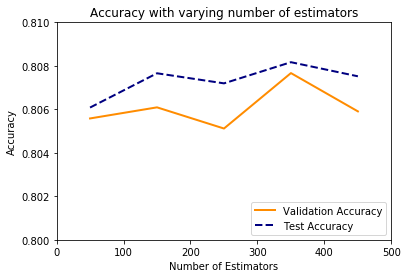

In [155]:
#Plotting the desired results with varying number of estimators
x_plot = []
val_plot = []
test_plot = []

#Getting data points from above dictionary
for i in n_estimators:
    x_plot.append(i)
    point = (i,features,split)
    val_plot.append(models[point][1])
    test_plot.append(models[point][2])

print("X_Plot", x_plot)
print("Val_Plot", val_plot)
print("Test_Plot", test_plot)

plt.figure()
lw=2
plt.plot(x_plot, val_plot, color='darkorange', lw=lw, label='Validation Accuracy')
plt.plot(x_plot, test_plot, color='navy', lw=lw, linestyle='--', label='Test Accuracy')
plt.xlim([0, 500])
plt.ylim([0.8, 0.81])
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Accuracy with varying number of estimators')
plt.legend(loc="lower right")
plt.show()

X_Plot [0.1, 0.30000000000000004, 0.5000000000000001, 0.7000000000000001, 0.9000000000000001]
Val_Plot [0.8066475060263304, 0.807667346560356, 0.8059058038197664, 0.8060912293714074, 0.8048859632857408]
Test_Plot [0.807519354689166, 0.8081683742061101, 0.8067312595614482, 0.8067312595614482, 0.8048305595475407]


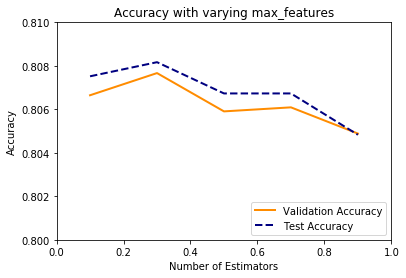

In [156]:
#Plotting the desired results with varying max_features
x_plot = []
val_plot = []
test_plot = []

#Getting data points from above dictionary
for i in max_features:
    x_plot.append(i)
    point = (estimator, i, split)
    val_plot.append(models[point][1])
    test_plot.append(models[point][2])

print("X_Plot", x_plot)
print("Val_Plot", val_plot)
print("Test_Plot", test_plot)

plt.figure()
lw=2
plt.plot(x_plot, val_plot, color='darkorange', lw=lw, label='Validation Accuracy')
plt.plot(x_plot, test_plot, color='navy', lw=lw, linestyle='--', label='Test Accuracy')
plt.xlim([0, 1])
plt.ylim([0.8, 0.81])
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Accuracy with varying max_features')
plt.legend(loc="lower right")
plt.show()

X_Plot [2, 4, 6, 8, 10]
Val_Plot [0.798349712590395, 0.8013628778045615, 0.8031707769330614, 0.8046541813461895, 0.807667346560356]
Test_Plot [0.7991748180427426, 0.8031152936813314, 0.805340503453711, 0.8073802790783923, 0.8081683742061101]


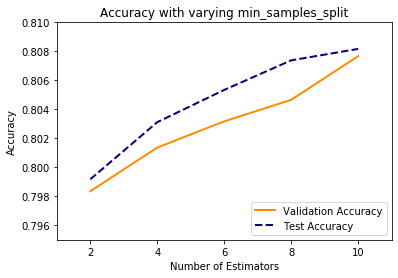

In [157]:
#Plotting the desired results with varying min_samples_split
x_plot = []
val_plot = []
test_plot = []

#Getting data points from above dictionary
for i in min_samples_split:
    x_plot.append(i)
    point = (estimator, features, i)
    val_plot.append(models[point][1])
    test_plot.append(models[point][2])

print("X_Plot", x_plot)
print("Val_Plot", val_plot)
print("Test_Plot", test_plot)

plt.figure()
lw=2
plt.plot(x_plot, val_plot, color='darkorange', lw=lw, label='Validation Accuracy')
plt.plot(x_plot, test_plot, color='navy', lw=lw, linestyle='--', label='Test Accuracy')
plt.xlim([1, 11])
plt.ylim([0.795, 0.81])
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Accuracy with varying min_samples_split')
plt.legend(loc="lower right")
plt.show()